## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [ ]:
print(f"The no. of elements in training set is {X_train.shape[0]} and that in testing dataset is {X_test.shape[0]}")

The no. of elements in training set is 60000 and that in testing dataset is 10000


**What are the labels in the dataset?**

In [ ]:
print(f"The labels for the training dataset is {y_train}")

The labels for the training dataset is [5 0 4 ... 5 6 8]


**Visualise one image for each label.**

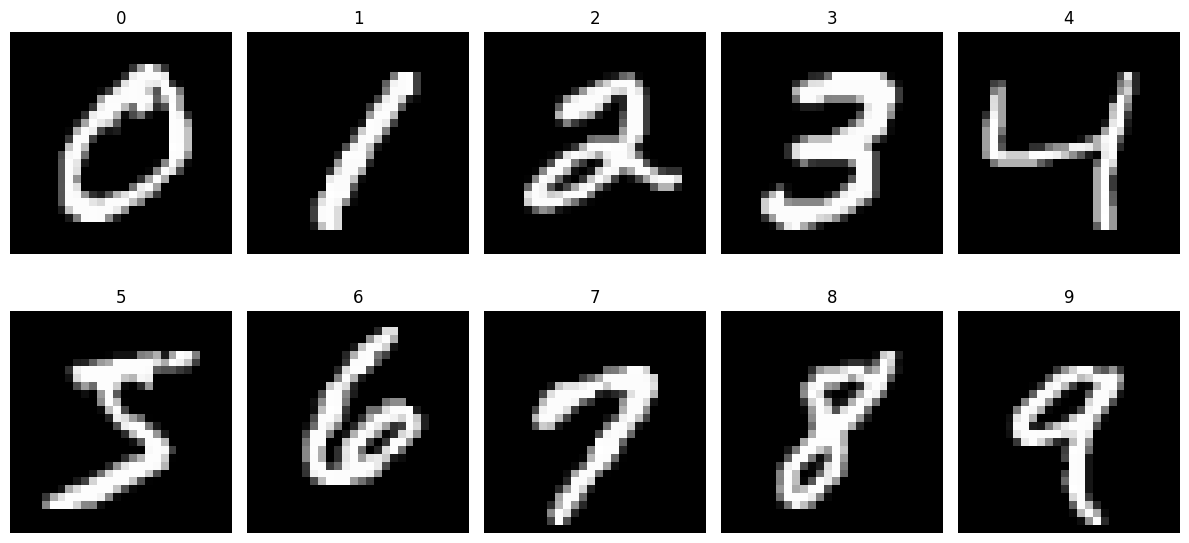

In [2]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for label in range(10):
    idx = np.where(y_train == label)[0][0]

    ax = axes[label // 5, label % 5]
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(label)
    ax.axis('off')
plt.tight_layout()
plt.show()


**One-hot encode the y labels.**

In [3]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)


**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

Pixel values of the image at index 0:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

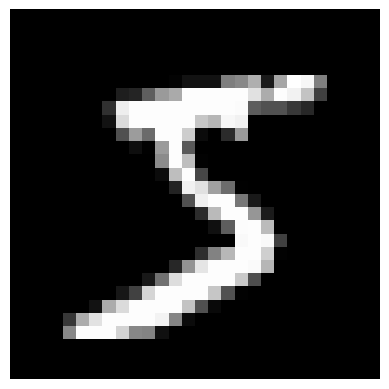

In [4]:
image_pixels = X_train[0]

print(f"Pixel values of the image at index {0}:")
print(image_pixels)

plt.imshow(image_pixels, cmap='gray')
plt.axis('off')
plt.show()


**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [6]:
X_train = X_train/255
X_test = X_test/255

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [13]:
model = tf.keras.models.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


**Fit the model and plot the training history.**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9108 - loss: 0.2843 - val_accuracy: 0.9850 - val_loss: 0.0475
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9860 - loss: 0.0425 - val_accuracy: 0.9872 - val_loss: 0.0386
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9889 - val_loss: 0.0305
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9914 - val_loss: 0.0260
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9897 - val_loss: 0.0327
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9905 - val_loss: 0.0322
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9917 - val_loss: 0.0355
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9976 -

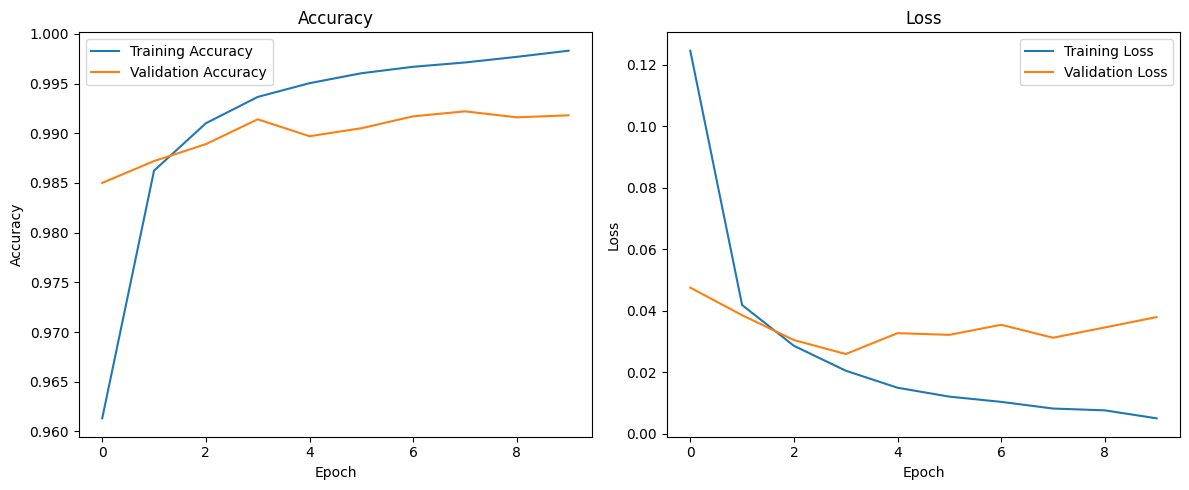

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

def plot_training_history(history):
    # Extract values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(acc, label='Training Accuracy')
    ax1.plot(val_acc, label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(loss, label='Training Loss')
    ax2.plot(val_loss, label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


**Now test your model on the training dataset and print the classification matrix.**

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


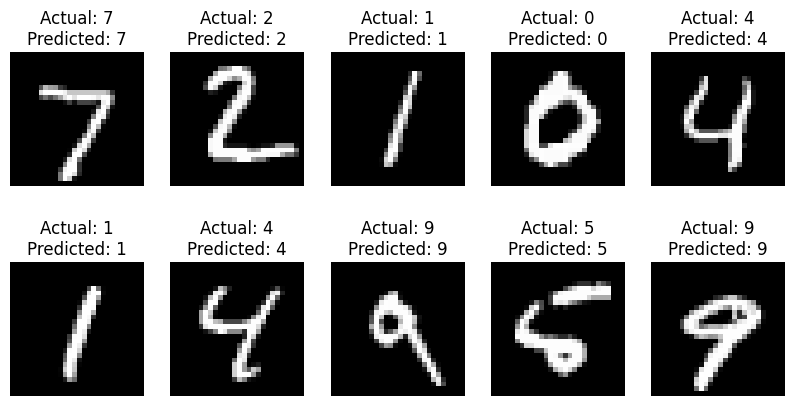

In [11]:
rows = 2
columns = 5

y_pred = model.predict(X_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(X_test[i], cmap='grey')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

In [14]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

test_image = X_test[0].reshape(1, 28, 28, 1)

feature_maps = activation_model.predict(test_image)

plt.figure(figsize=(5, 5))
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

n_filters = feature_maps[0].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[0][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()


ValueError: The layer sequential_2 has never been called and thus has no defined input.

**Output of the max pooling layer.**

In [15]:
n_filters = feature_maps[1].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[1][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()

NameError: name 'feature_maps' is not defined